In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

import sys
sys.path.append('../')
from src import data

from netneurotools import metrics 

import mne
plt.rcParams['figure.figsize'] = [10, 5]

%matplotlib inline

!date -I

2024-02-19


In [4]:
empirical = np.load(data.path('external/pytepfit/source_estimates/empirical.npz'))
empirical['ts'].shape

(400, 200)

In [5]:
simulated = np.load(data.path('external/pytepfit/source_estimates/simulated.npz'))
simulated['ts'].shape

(400, 200)

In [6]:
empirical['labels'][:10]

array(['7Networks_LH_Cont_Cing_1-lh', '7Networks_LH_Cont_Cing_2-lh',
       '7Networks_LH_Cont_PFCl_1-lh', '7Networks_LH_Cont_PFCl_2-lh',
       '7Networks_LH_Cont_PFCl_3-lh', '7Networks_LH_Cont_PFCl_4-lh',
       '7Networks_LH_Cont_PFCl_5-lh', '7Networks_LH_Cont_PFCl_6-lh',
       '7Networks_LH_Cont_Par_1-lh', '7Networks_LH_Cont_Par_2-lh'],
      dtype='<U40')

In [7]:
empirical['labels'].shape

(200,)

In [8]:
empirical['labels'][:10]

array(['7Networks_LH_Cont_Cing_1-lh', '7Networks_LH_Cont_Cing_2-lh',
       '7Networks_LH_Cont_PFCl_1-lh', '7Networks_LH_Cont_PFCl_2-lh',
       '7Networks_LH_Cont_PFCl_3-lh', '7Networks_LH_Cont_PFCl_4-lh',
       '7Networks_LH_Cont_PFCl_5-lh', '7Networks_LH_Cont_PFCl_6-lh',
       '7Networks_LH_Cont_Par_1-lh', '7Networks_LH_Cont_Par_2-lh'],
      dtype='<U40')

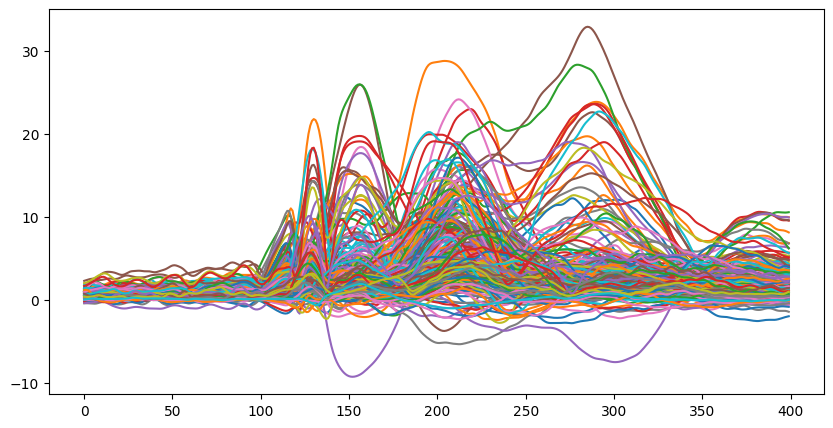

In [9]:
plt.plot(empirical['ts']);

In [10]:
empirical['ts'].shape

(400, 200)

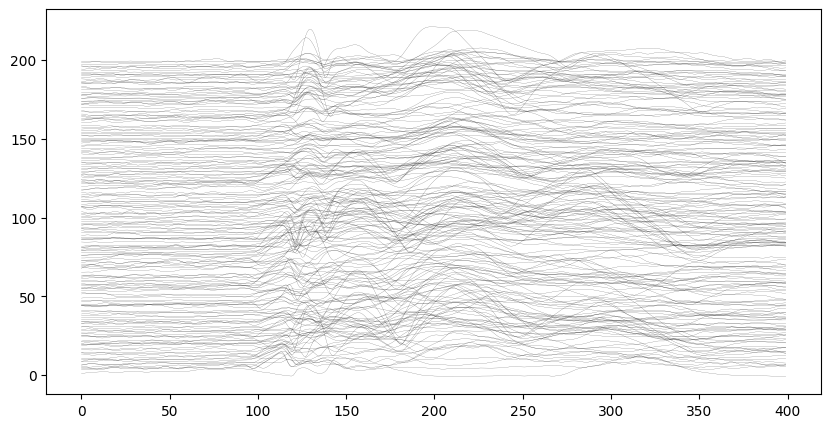

In [11]:
plt.plot( empirical['ts'] * 2 + np.arange(200), 'k-', lw=0.1);

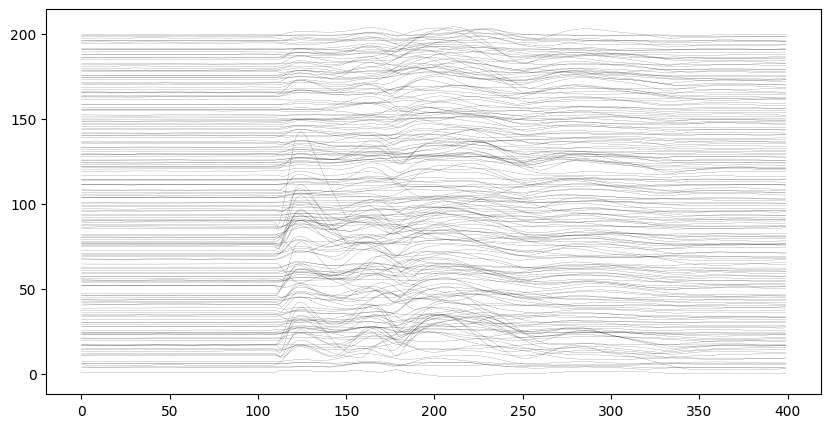

In [12]:
plt.plot( simulated['ts'] * 2 + np.arange(200), 'k-', lw=0.1);

In [18]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [19]:
n_roi = empirical['ts'].shape[1]

def plot(roi):
    fig, ax = plt.subplots()
    ax.plot( empirical['ts'][:,roi], label='empirical');
    ax.plot( simulated['ts'][:,roi], label='simulated');
    ax.set_ylim([-10,30])
    ax.legend(title=f'roi {roi}')

interact(plot, roi=widgets.IntSlider(max=n_roi-1))

interactive(children=(IntSlider(value=0, description='roi', max=199), Output()), _dom_classes=('widget-interac…

<function __main__.plot(roi)>

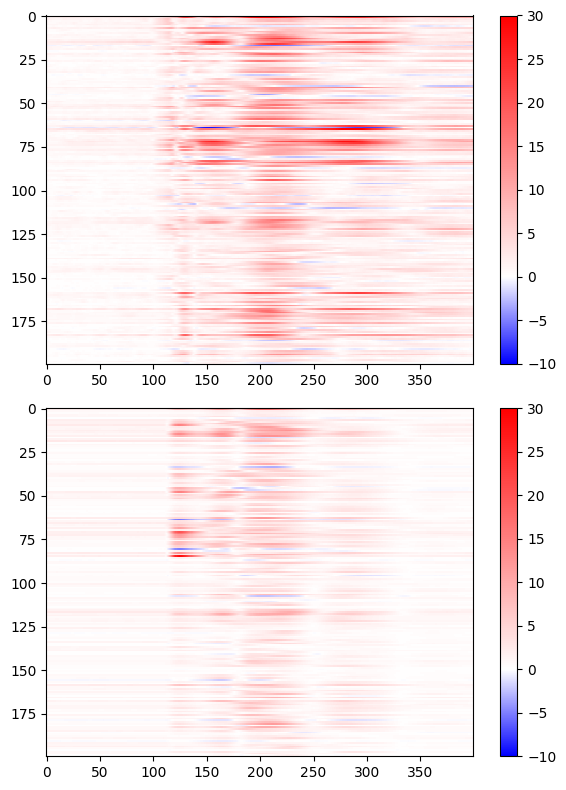

In [20]:
fig, axs = plt.subplots(nrows=2, figsize=(6,8))

from matplotlib import colors
kwds = dict(interpolation='none', aspect='auto', cmap='bwr', norm=colors.TwoSlopeNorm(vmin=-10, vmax=30, vcenter=0.))

for ax, ts in zip(axs.flatten(), [empirical['ts'].T, simulated['ts'].T]):
    im = ax.imshow(ts, **kwds)
    cb = plt.colorbar(im, ax=ax)
    cb.ax.set_yscale('linear') # 😡

fig.tight_layout()

In [39]:
def plot(thr,ts):
    m = np.mean(ts[:80,:])
    v = np.std(ts[:80,:])

    plt.imshow(
        ((ts - m)/v).T > thr*v,
        aspect='auto',  cmap='binary', extent=[0,400,0,200])
    plt.colorbar()
    plt.plot([100,100], [0,200], color="r")

In [40]:
interact(plot, thr=widgets.IntSlider(max=400, min=1), ts = fixed(empirical['ts']))

interactive(children=(IntSlider(value=1, description='thr', max=400, min=1), Output()), _dom_classes=('widget-…

<function __main__.plot(thr, ts)>

In [41]:
interact(plot, thr=widgets.IntSlider(max=40, min=1),ts=fixed(simulated['ts']))

interactive(children=(IntSlider(value=1, description='thr', max=40, min=1), Output()), _dom_classes=('widget-i…

<function __main__.plot(thr, ts)>

In [32]:
(ts/np.mean(ts[:80,:], axis=0)).shape

(400, 200)